# Titanic – Machine Learning Model

This notebook loads the cleaned Titanic dataset, builds a simple machine learning model, and evaluates its performance.

## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

sns.set(style='whitegrid')

## 2. Load Cleaned Dataset

In [6]:
# Adjust the path if needed
# If the file is in the same folder:
df = pd.read_csv('titanic_cleaned.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,False,True


## 3. Feature Selection

In [9]:
df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace=True)

# Identify boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# Convert them to integers (0 and 1)
df[bool_cols] = df[bool_cols].astype(int)
df.to_csv('Titanic_encode.csv',)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [11]:

X = df.drop('Survived', axis=1)
y = df['Survived']

## 4. Train/Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Train Logistic Regression Model

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 6. Evaluate Model

In [20]:
y_pred = model.predict(X_test)

joblib.dump(model, "model.pkl")
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



## 7. Confusion Matrix

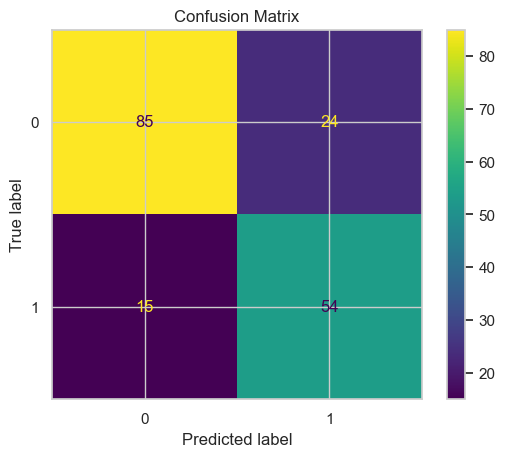

In [23]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

86 true negatives (predicted 0 and was 0)
53 true positives (predicted 1 and was 1)

Quick metrics:
Accuracy:
[(86 + 53) / (86 + 23 + 16 + 53) = 139 / 178 ≈ 78%]

Precision (for class 1 - survivors):
53 / (53 + 23) ≈ 0.70

Recall (for class 1):
53 / (53 + 16) ≈ 0.77

## 8. ROC Curve & AUC

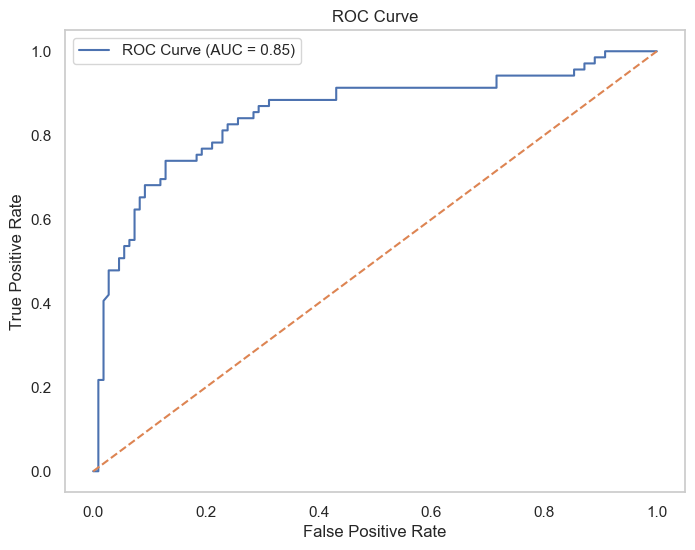

In [27]:
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

## 9. Conclusion

We trained a logistic regression model to predict survival on the Titanic dataset. Evaluation metrics and visualizations give us insight into the model's performance. In future steps, we could explore more advanced models such as Random Forests or XGBoost.